In [1]:
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils.func import get_pictures, apply_hough_transformation, group_lines, draw_line_group, generate_similar_color_pairs
from utils.lines import Line, Intersection

mpl.rcParams['image.cmap'] = 'gray'

#### reading images

In [2]:
train_pic = get_pictures('pics')['rgb'][7]

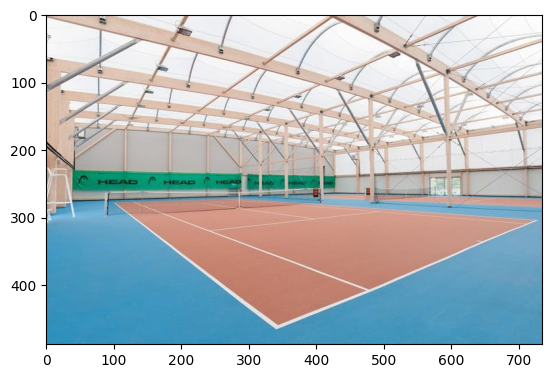

In [3]:
plt.imshow(train_pic)
plt.show()

#### computing hough transformation line endpoints

In [4]:
train_pic_hough_lines, line_endpoints = apply_hough_transformation(train_pic)

#### drawing line segments bounded by endpoints from hough transformation

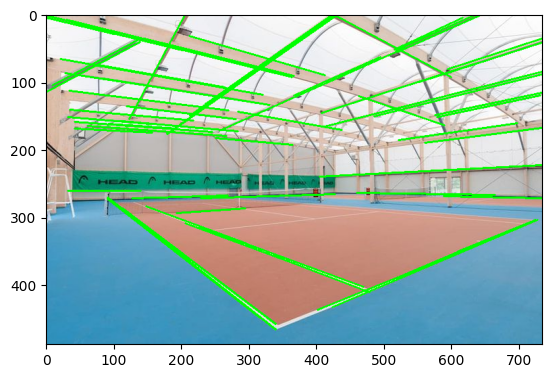

In [5]:
plt.imshow(train_pic_hough_lines)
plt.show()

#### computing lines from hough transformation endpoints (line segments)

In [6]:
line_objs = [Line.from_hough_line(line[0]) for line in line_endpoints]

#### drawing computed lines

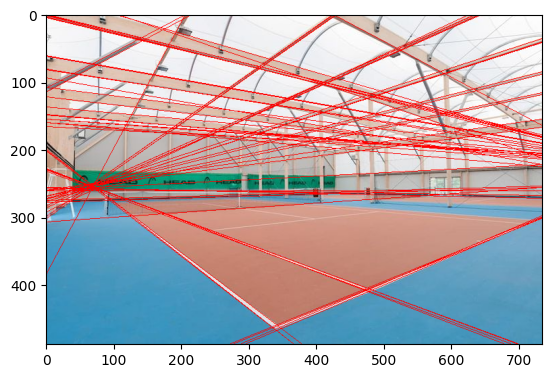

In [7]:
train_pic_lines = train_pic.copy()

for line in line_objs:
    points = line.limit_to_img(train_pic)
    cv2.line(train_pic_lines, *points, (255, 0, 0))
plt.imshow(train_pic_lines)
plt.show()

#### lines grouping and drawing it

In [8]:
grouped_lines = group_lines(line_objs, 5, 10)

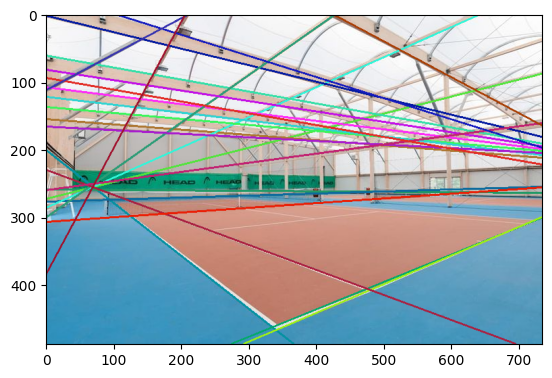

In [9]:
colors = generate_similar_color_pairs(len(grouped_lines))
train_pic_grouped_lines = train_pic.copy()

for color, group in zip(colors, grouped_lines):
    train_pic_grouped_lines = draw_line_group(train_pic_grouped_lines, group, *color)
plt.imshow(train_pic_grouped_lines)
plt.show()

#### find group lines intersections

In [10]:
train_pic_line_intersections = train_pic.copy()
intersections = []
for group1 in grouped_lines:
    for group2 in grouped_lines:
        intersection = group1.intersection(group2, train_pic_line_intersections)
        if intersection is not None:
            intersections.append(intersection)

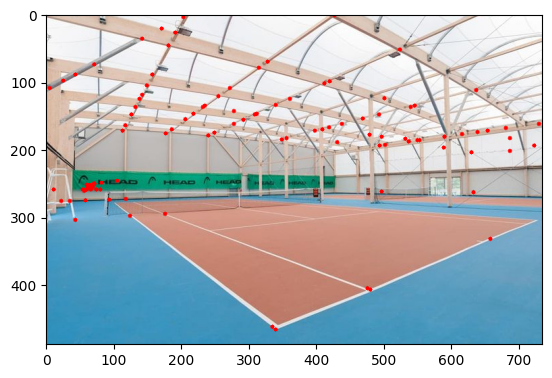

In [11]:
for intersection in intersections:
    cv2.circle(train_pic_line_intersections, intersection.point, 3, (255, 0, 0), -1)

plt.imshow(train_pic_line_intersections)
plt.show()

single intersection with attached lines

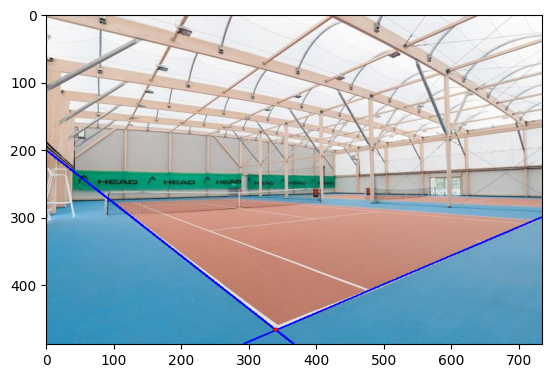

In [20]:
train_pic_single_intersection = train_pic.copy()

intersection = intersections[80]

pts1 = intersection.line1.limit_to_img(train_pic_single_intersection)
pts2 = intersection.line2.limit_to_img(train_pic_single_intersection)
    
cv2.line(train_pic_single_intersection, *pts1, (0, 0, 255), 2)
cv2.line(train_pic_single_intersection, *pts2, (0, 0, 255), 2)
cv2.circle(train_pic_single_intersection, intersection.point, 3, (255, 0, 0), -1)
plt.imshow(train_pic_single_intersection)
plt.show()

#### find bottom corner